In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasetHouse.csv')

In [ ]:
dataset.columns = dataset.columns.str.strip()

In [ ]:
print(dataset.head())

              Zona          Direccion  Superficie_m2  Dormitorios  Baños  \
0      Villa Adela            Calle 3            120            3      2   
1  Ciudad Satélite       Av. Satélite            180            4      2   
2      16 de Julio    Calle Principal             95            2      1   
3         Río Seco  Av. Juan Pablo II            150            3      2   
4      Santiago II            Calle 5            200            4      3   

  Garaje  Precio_USD  Cercania_Escuelas_km  Cercania_Hospitales_km  \
0     Si       75000                   0.3                     1.2   
1     Si       98000                   0.5                     0.7   
2     No       62000                   0.2                     0.9   
3     Si       82000                   0.8                     1.5   
4     Si      115000                   0.4                     1.1   

   Cercania_Teleferico_km  Edad_Propiedad_años  
0                     0.8                   15  
1                     0.

In [ ]:
print(dataset.shape)
print(dataset.info())

(105, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zona                    105 non-null    object 
 1   Direccion               105 non-null    object 
 2   Superficie_m2           105 non-null    int64  
 3   Dormitorios             105 non-null    int64  
 4   Baños                   105 non-null    int64  
 5   Garaje                  105 non-null    object 
 6   Precio_USD              105 non-null    int64  
 7   Cercania_Escuelas_km    105 non-null    float64
 8   Cercania_Hospitales_km  105 non-null    float64
 9   Cercania_Teleferico_km  105 non-null    float64
 10  Edad_Propiedad_años     105 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 9.1+ KB
None


In [ ]:
print(dataset.describe())

       Superficie_m2  Dormitorios       Baños     Precio_USD  \
count     105.000000   105.000000  105.000000     105.000000   
mean      147.523810     3.352381    1.942857   86923.809524   
std        29.735402     0.664787    0.676936   15565.429667   
min        95.000000     2.000000    1.000000   60000.000000   
25%       120.000000     3.000000    1.000000   74000.000000   
50%       150.000000     3.000000    2.000000   88000.000000   
75%       175.000000     4.000000    2.000000   98000.000000   
max       200.000000     4.000000    3.000000  116000.000000   

       Cercania_Escuelas_km  Cercania_Hospitales_km  Cercania_Teleferico_km  \
count            105.000000              105.000000              105.000000   
mean               0.545714                1.405714                0.870476   
std                0.193166                0.354593                0.317116   
min                0.200000                0.700000                0.200000   
25%                0.400000 

In [ ]:
print(dataset.isnull().sum())

Zona                      0
Direccion                 0
Superficie_m2             0
Dormitorios               0
Baños                     0
Garaje                    0
Precio_USD                0
Cercania_Escuelas_km      0
Cercania_Hospitales_km    0
Cercania_Teleferico_km    0
Edad_Propiedad_años       0
dtype: int64


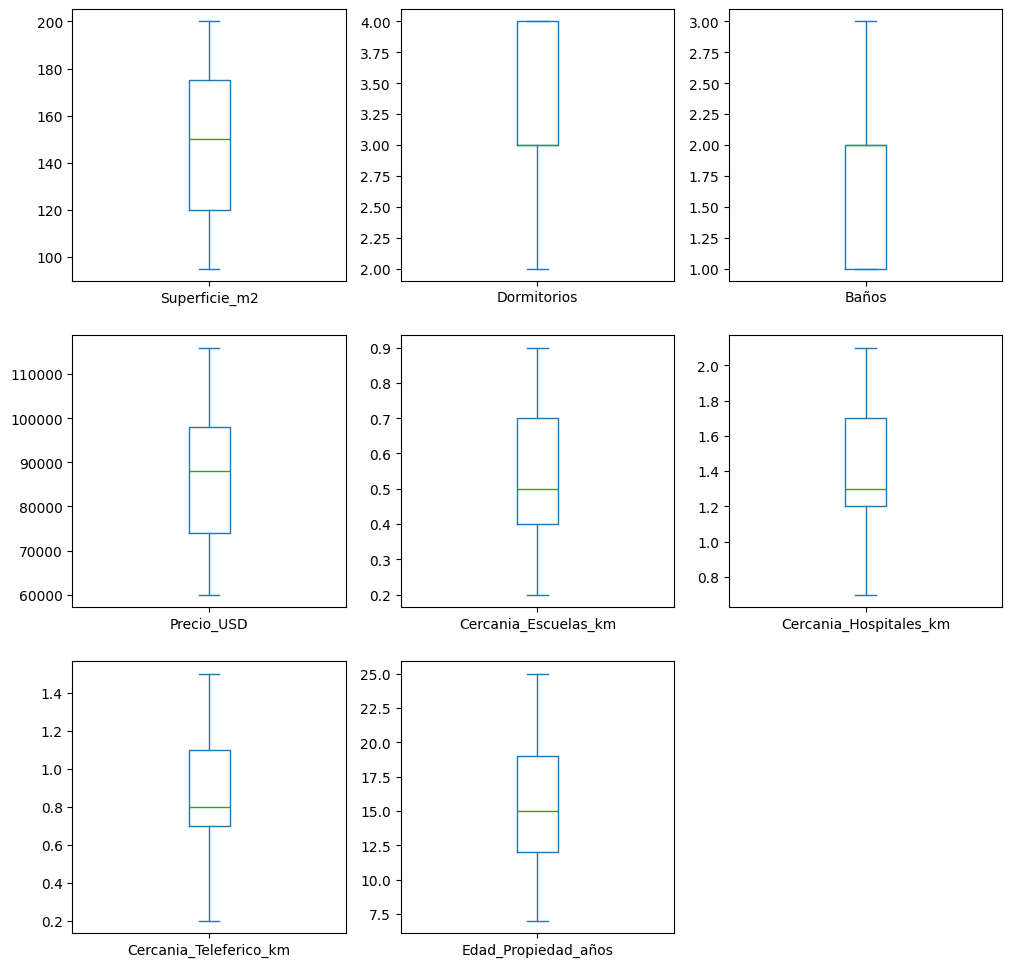

In [ ]:
# Boxplot para ver la distribución de las variables
dataset.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 12), sharex=False, sharey=False)
plt.show()

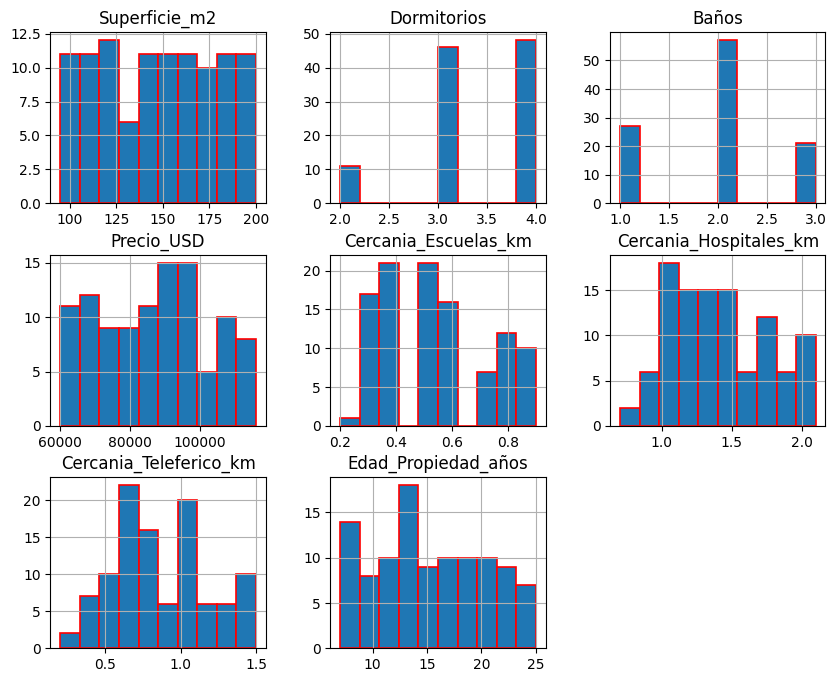

In [ ]:
# Histograma para ver la distribución de cada columna
dataset.hist(edgecolor='red', linewidth=1.2, figsize=(10, 8))
plt.show()

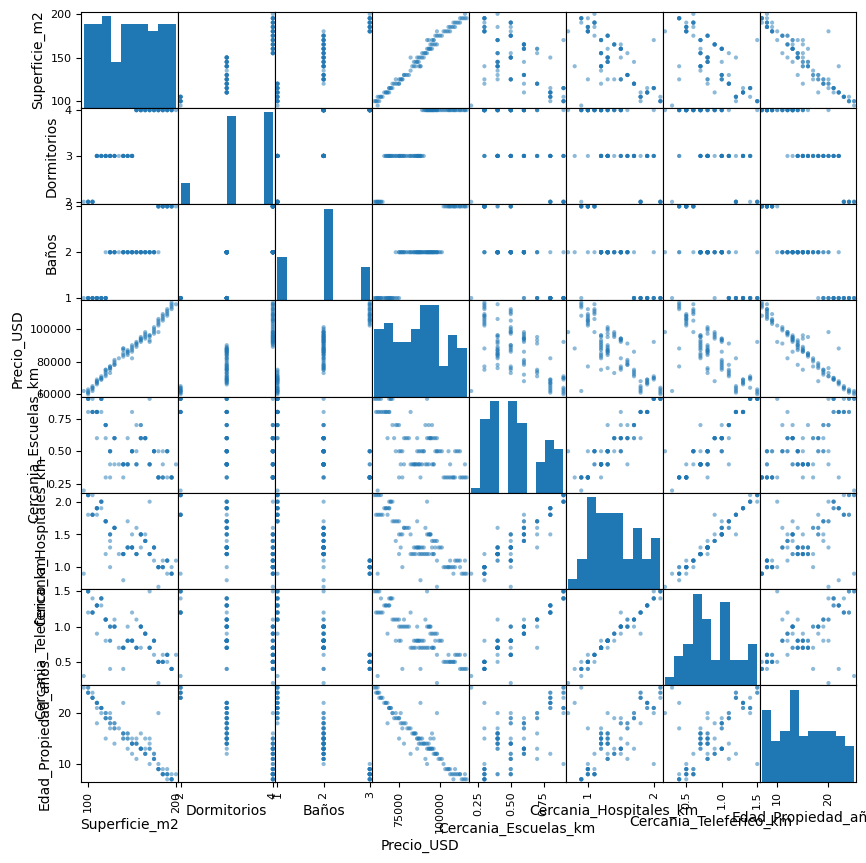

In [ ]:
# Matriz de dispersión para ver relaciones entre todas las variables numéricas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(10, 10))
plt.show()

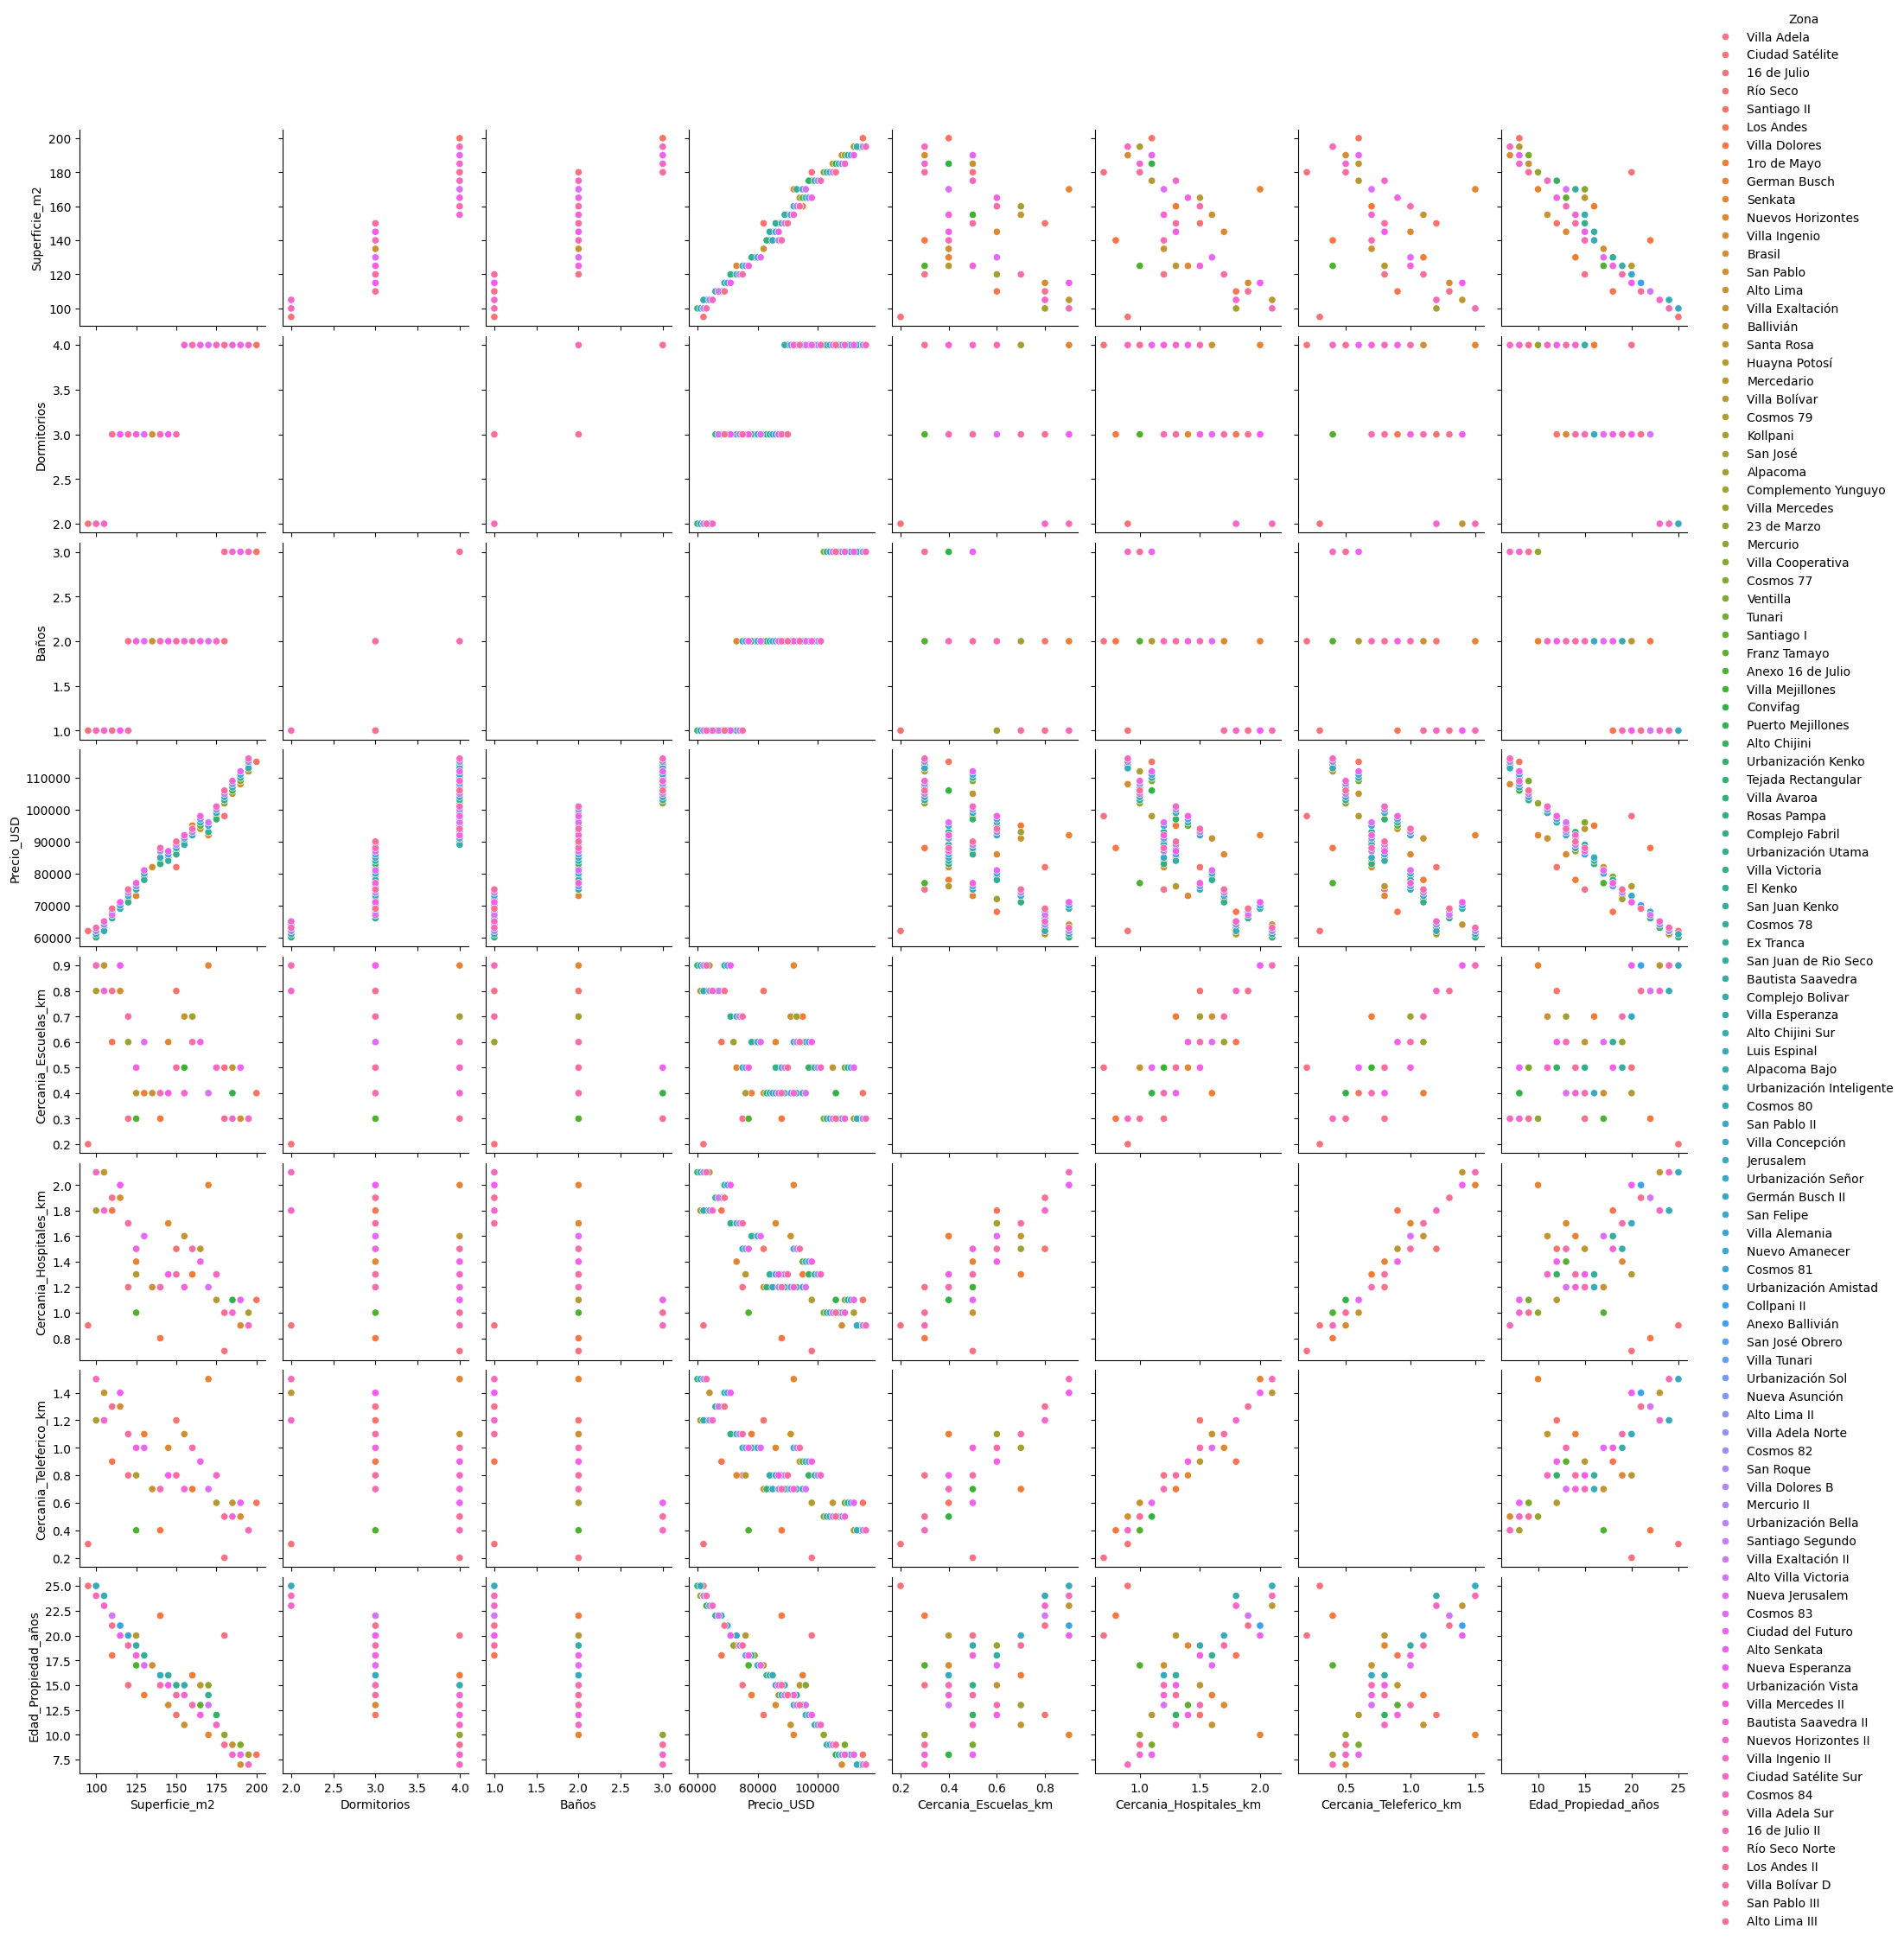

In [ ]:
# Pairplot de seaborn para visualizar las relaciones entre variables, color por 'Zona'
sns.pairplot(dataset, hue='Zona', diag_kind='kde')
plt.show()

In [ ]:
random.seed(42)
np.random.seed(42)

In [ ]:
caracteristicas_relevantes = ['Superficie_m2', 'Dormitorios', 'Baños', 'Garaje',
                              'Cercania_Escuelas_km', 'Cercania_Hospitales_km',
                              'Cercania_Teleferico_km', 'Edad_Propiedad_años']
objetivo = 'Precio_USD'

In [ ]:
df = dataset[caracteristicas_relevantes + [objetivo]].copy()

In [ ]:
print(df.columns)

Index(['Superficie_m2', 'Dormitorios', 'Baños', 'Garaje',
       'Cercania_Escuelas_km', 'Cercania_Hospitales_km',
       'Cercania_Teleferico_km', 'Edad_Propiedad_años', 'Precio_USD'],
      dtype='object')


In [ ]:
df['Garaje'] = df['Garaje'].map({'Si': 1, 'No': 0})  # Convertir Garaje en binario

In [ ]:
# Dividir los datos en características (X) y objetivo (y)
X = df.drop(objetivo, axis=1)
y = df[objetivo]

In [ ]:
# Función para dividir los datos en conjuntos de entrenamiento y prueba
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    test_n = int(n * test_size)
    indices = list(range(n))
    random.shuffle(indices)
    test_indices = indices[:test_n]
    train_indices = indices[test_n:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

In [ ]:
# Función para dividir los datos en conjuntos de entrenamiento y prueba
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    test_n = int(n * test_size)
    indices = list(range(n))
    random.shuffle(indices)
    test_indices = indices[:test_n]
    train_indices = indices[test_n:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# 2. Implementación del modelo
# Clase para Árbol de Decisión
class ArbolDecision:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def dividir_nodo(self, X, y, profundidad):
        m = X.shape[1]
        if len(y) <= 3 or profundidad >= self.max_depth:
            return np.mean(y)

        # Seleccionar un subconjunto aleatorio de características (Paso 1)
        n_features = int(np.sqrt(m))  # Subconjunto aleatorio de características
        features = np.random.choice(m, n_features, replace=False)

        mejor_ganancia = 0
        mejor_pregunta = None
        mejor_izquierda = None
        mejor_derecha = None

        for col in features:
            valores_unicos = np.unique(X[:, col])
            for valor in valores_unicos:
                pregunta = (col, valor)
                izquierda, derecha = self.partir(X, y, pregunta)
                if len(izquierda[1]) > 0 and len(derecha[1]) > 0:
                    ganancia = self.ganancia_informacion(y, izquierda[1], derecha[1])
                    if ganancia > mejor_ganancia:
                        mejor_ganancia = ganancia
                        mejor_pregunta = pregunta
                        mejor_izquierda = izquierda
                        mejor_derecha = derecha

        if mejor_ganancia > 0:
            izquierda = self.dividir_nodo(mejor_izquierda[0], mejor_izquierda[1], profundidad + 1)
            derecha = self.dividir_nodo(mejor_derecha[0], mejor_derecha[1], profundidad + 1)
            return (mejor_pregunta, izquierda, derecha)

        return np.mean(y)

    def partir(self, X, y, pregunta):
        col, valor = pregunta
        mascara = X[:, col] >= valor
        return (X[~mascara], y[~mascara]), (X[mascara], y[mascara])

    def ganancia_informacion(self, padre, izquierda, derecha):
        p = len(izquierda) / len(padre)
        return self.varianza(padre) - p * self.varianza(izquierda) - (1 - p) * self.varianza(derecha)

    def varianza(self, y):
        if len(y) == 0:
            return 0
        return np.var(y)

    def ajustar(self, X, y):
        self.raiz = self.dividir_nodo(X.values, y.values, 0)

    def predecir_uno(self, x, nodo):
        if isinstance(nodo, tuple):
            pregunta, izquierda, derecha = nodo
            if x[pregunta[0]] >= pregunta[1]:
                return self.predecir_uno(x, derecha)
            else:
                return self.predecir_uno(x, izquierda)
        else:
            return nodo

    def predecir(self, X):
        return [self.predecir_uno(x, self.raiz) for x in X.values]

# Clase para Bosque Aleatorio
class BosqueAleatorio:
    def __init__(self, n_arboles=10, max_depth=5):
        self.n_arboles = n_arboles
        self.max_depth = max_depth
        self.arboles = []

    def ajustar(self, X, y):
        for _ in range(self.n_arboles):
            arbol = ArbolDecision(max_depth=self.max_depth)
            # Crear subconjuntos diferentes con Bootstrap Sampling (Paso 2)
            indices = np.random.choice(len(X), len(X), replace=True)
            X_muestra = X.iloc[indices]
            y_muestra = y.iloc[indices]
            arbol.ajustar(X_muestra, y_muestra)
            self.arboles.append(arbol)

    def predecir(self, X, clasificacion=False):
        predicciones = np.array([arbol.predecir(X) for arbol in self.arboles])
        if clasificacion:
            # Agregar votación para clasificación (Paso 3)
            from scipy.stats import mode
            return mode(predicciones, axis=0).mode[0]
        else:
            # Agregar promedio para regresión
            return np.mean(predicciones, axis=0)

In [ ]:
# 3. Evaluación del modelo
modelo_rf = BosqueAleatorio(n_arboles=10, max_depth=5)
modelo_rf.ajustar(X_train, y_train)

y_pred = modelo_rf.predecir(X_test)

# Calcular métricas de evaluación
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Error Cuadrático Medio: {mse}")
print(f"Raíz del Error Cuadrático Medio: {rmse}")
print(f"Puntuación R-cuadrado: {r2}")

Error Cuadrático Medio: 6660990.562665166
Raíz del Error Cuadrático Medio: 2580.8894905952807
Puntuación R-cuadrado: 0.9561109093360923


In [ ]:
# 4. Implementación del modelo
def predecir_precio(nuevos_datos):
    return modelo_rf.predecir(nuevos_datos)[0]

nueva_propiedad = pd.DataFrame({
    'Superficie_m2': [150],
    'Dormitorios': [3],
    'Baños': [2],
    'Garaje': [1],
    'Cercania_Escuelas_km': [0.7],
    'Cercania_Hospitales_km': [1.2],
    'Cercania_Teleferico_km': [0.8],
    'Edad_Propiedad_años': [10]
})

In [ ]:
precio_predicho = predecir_precio(nueva_propiedad)
print(f"Precio Predicho: ${precio_predicho:.2f}")

Precio Predicho: $88297.16


 Calcula la importancia de las características utilizando el bosque aleatorio.
    
    Parámetros:
    - modelo_rf: Modelo de Bosque Aleatorio entrenado
    - caracteristicas: Lista de nombres de características
    
    Retorna:
    - Gráfico de importancia de características
    - Diccionario de importancias

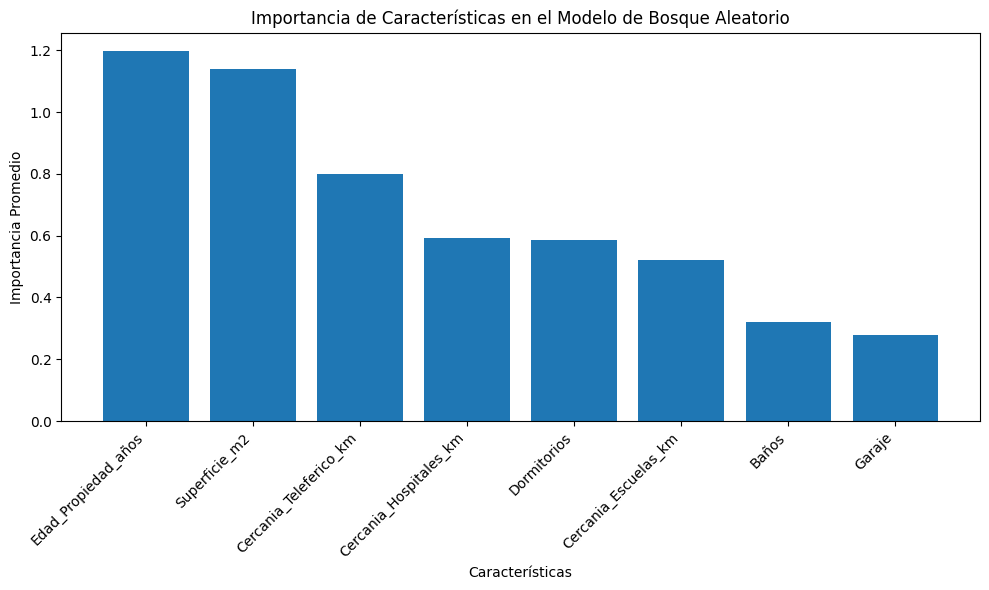

Importancia de Características:
Edad_Propiedad_años: 1.1967
Superficie_m2: 1.1383
Cercania_Teleferico_km: 0.8000
Cercania_Hospitales_km: 0.5933
Dormitorios: 0.5867
Cercania_Escuelas_km: 0.5217
Baños: 0.3200
Garaje: 0.2783


In [ ]:
def calcular_importancia_caracteristicas(modelo_rf, caracteristicas):
    # Calcular importancia de características
    importancias = []
    for arbol in modelo_rf.arboles:
        # Extraer la importancia de cada árbol de manera recursiva
        importancia_arbol = calcular_importancia_recursiva(arbol.raiz)
        importancias.append(importancia_arbol)

    # Promediar las importancias de todos los árboles
    importancia_promedio = {}
    for caracteristica in caracteristicas:
        valores = [imp.get(caracteristica, 0) for imp in importancias]
        importancia_promedio[caracteristica] = np.mean(valores)

    # Ordenar características por importancia
    caracteristicas_ordenadas = sorted(
        importancia_promedio.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Graficar importancia de características
    plt.figure(figsize=(10, 6))
    caracteristicas_nombres = [x[0] for x in caracteristicas_ordenadas]
    importancias_valores = [x[1] for x in caracteristicas_ordenadas]

    plt.bar(caracteristicas_nombres, importancias_valores)
    plt.title('Importancia de Características en el Modelo de Bosque Aleatorio')
    plt.xlabel('Características')
    plt.ylabel('Importancia Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return dict(caracteristicas_ordenadas)

def calcular_importancia_recursiva(nodo, importancia=None, profundidad=0):
    #Función recursiva para calcular la importancia de características en un árbol.

    if importancia is None:
        importancia = {}

    # Si el nodo es un valor (hoja), retornar la importancia actual
    if not isinstance(nodo, tuple):
        return importancia

    # Desempaquetar el nodo
    pregunta, izquierda, derecha = nodo

    # Obtener la característica de la pregunta
    caracteristica = list(X.columns)[pregunta[0]]

    # Incrementar la importancia de la característica
    # Ponderada por la profundidad del árbol
    importancia[caracteristica] = importancia.get(caracteristica, 0) + 1 / (profundidad + 1)

    # Recursivamente explorar ramas izquierda y derecha
    calcular_importancia_recursiva(izquierda, importancia, profundidad + 1)
    calcular_importancia_recursiva(derecha, importancia, profundidad + 1)

    return importancia

# Calcular y visualizar importancia de características
importancia_caracteristicas = calcular_importancia_caracteristicas(modelo_rf, X.columns)

# Imprimir importancias en orden descendente
print("Importancia de Características:")
for caracteristica, valor in importancia_caracteristicas.items():
    print(f"{caracteristica}: {valor:.4f}")

In [ ]:
# Seleccionar los features más importantes (por ejemplo, los 4 principales)
def seleccionar_top_features(importancia_caracteristicas, n_top=4):
    # Ordenar características por importancia
    caracteristicas_ordenadas = sorted(
        importancia_caracteristicas.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Seleccionar los top n features
    top_features = [feature for feature, _ in caracteristicas_ordenadas[:n_top]]
    return top_features

# Seleccionar top 4 características
top_features = seleccionar_top_features(importancia_caracteristicas)
print("Top Features Seleccionados:", top_features)

# Crear nuevo dataset con solo los top features
X_top = X[top_features]

# Dividir los datos nuevamente
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y)

# Entrenar nuevo modelo con features seleccionados
modelo_rf_top = BosqueAleatorio(n_arboles=10, max_depth=5)
modelo_rf_top.ajustar(X_train_top, y_train)

# Predecir con el nuevo modelo
y_pred_top = modelo_rf_top.predecir(X_test_top)

# Calcular métricas de evaluación
mse_top = np.mean((y_test - y_pred_top) ** 2)
rmse_top = np.sqrt(mse_top)
r2_top = 1 - (np.sum((y_test - y_pred_top) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("\nResultados con Features Seleccionados:")
print(f"Error Cuadrático Medio: {mse_top}")
print(f"Raíz del Error Cuadrático Medio: {rmse_top}")
print(f"Puntuación R-cuadrado: {r2_top}")

# Comparación con modelo anterior
print("\nComparación de Modelos:")
print(f"R-cuadrado (Modelo Original): {r2}")
print(f"R-cuadrado (Modelo con Top Features): {r2_top}")

# Función de predicción con nuevos features
def predecir_precio_top(nuevos_datos):
    return modelo_rf_top.predecir(nuevos_datos)[0]

# Ejemplo de predicción con nueva propiedad usando solo top features
nueva_propiedad_top = nueva_propiedad[top_features]
precio_predicho_top = predecir_precio_top(nueva_propiedad_top)
print(f"\nPrecio Predicho (Features Importantes): ${precio_predicho_top:.2f}")

Top Features Seleccionados: ['Edad_Propiedad_años', 'Superficie_m2', 'Cercania_Teleferico_km', 'Cercania_Hospitales_km']

Resultados con Features Seleccionados:
Error Cuadrático Medio: 6476249.503636366
Raíz del Error Cuadrático Medio: 2544.8476385898557
Puntuación R-cuadrado: 0.9686144087660867

Comparación de Modelos:
R-cuadrado (Modelo Original): 0.9561109093360923
R-cuadrado (Modelo con Top Features): 0.9686144087660867

Precio Predicho (Features Importantes): $91284.44


Número de árboles en el bosque aleatorio: 10


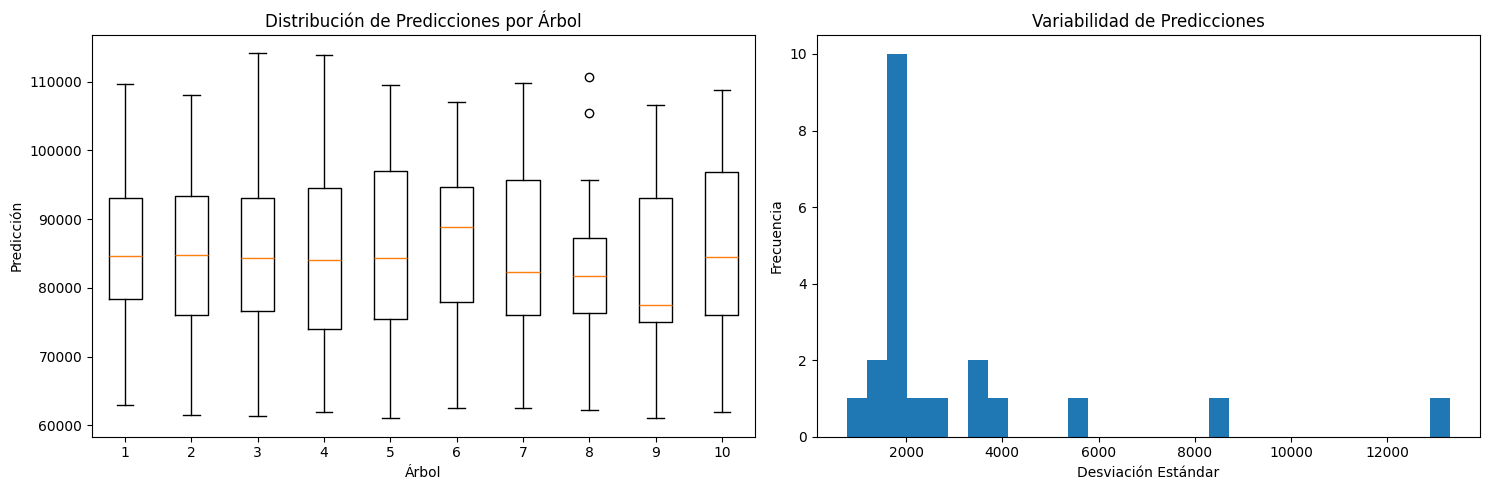

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

class AnalizadorBosqueAleatorio:
    def __init__(self, bosque_aleatorio):
        self.bosque_aleatorio = bosque_aleatorio

    def obtener_cantidad_arboles(self):
        #Obtiene la cantidad de árboles en el bosque
        return len(self.bosque_aleatorio.arboles)

    def crear_grafo_arbol(self, arbol, profundidad_maxima=5):
        G = nx.DiGraph()

        def agregar_nodos(nodo, padre=None, etiqueta='Raíz', profundidad=0):
            if profundidad > profundidad_maxima:
                return

            if isinstance(nodo, tuple):
                pregunta, izquierda, derecha = nodo

                # Crear etiqueta para el nodo
                col = list(X.columns)[pregunta[0]]
                valor = pregunta[1]
                nueva_etiqueta = f"{col} >= {valor:.2f}"

                # Agregar nodo al grafo
                G.add_node(nueva_etiqueta)

                # Conectar con padre si existe
                if padre:
                    G.add_edge(padre, nueva_etiqueta)

                # Recursión para ramas izquierda y derecha
                agregar_nodos(izquierda, nueva_etiqueta, 'Izquierda', profundidad+1)
                agregar_nodos(derecha, nueva_etiqueta, 'Derecha', profundidad+1)
            else:
                # Nodos hoja (predicción)
                nueva_etiqueta = f"Predicción: {nodo:.2f}"
                G.add_node(nueva_etiqueta)
                if padre:
                    G.add_edge(padre, nueva_etiqueta)

        agregar_nodos(arbol.raiz)
        return G

    def visualizar_arboles(self, num_arboles=5):

        #Visualiza los primeros num_arboles del bosque aleatorio

        plt.figure(figsize=(20, 5*num_arboles))

        for i in range(min(num_arboles, len(self.bosque_aleatorio.arboles))):
            arbol = self.bosque_aleatorio.arboles[i]
            G = self.crear_grafo_arbol(arbol)

            plt.subplot(num_arboles, 1, i+1)
            pos = nx.spring_layout(G, k=0.5)  # posiciones para todos los nodos
            nx.draw(
                G,
                pos,
                with_labels=True,
                node_color='lightblue',
                node_size=1500,
                font_size=8,
                font_weight="bold"
            )
            plt.title(f'Estructura del Árbol {i+1}')

        plt.tight_layout()
        plt.show()

    def analizar_distribucion_predicciones(self):

        #Analiza la distribución de predicciones entre los árboles
        predicciones_arboles = [arbol.predecir(X_test) for arbol in self.bosque_aleatorio.arboles]

        plt.figure(figsize=(15, 5))

        # Boxplot de predicciones por árbol
        plt.subplot(1, 2, 1)
        plt.boxplot(predicciones_arboles)
        plt.title('Distribución de Predicciones por Árbol')
        plt.xlabel('Árbol')
        plt.ylabel('Predicción')

        # Histograma de variabilidad
        plt.subplot(1, 2, 2)
        predicciones_por_muestra = np.array(predicciones_arboles)
        variabilidad = np.std(predicciones_por_muestra, axis=0)
        plt.hist(variabilidad, bins=30)
        plt.title('Variabilidad de Predicciones')
        plt.xlabel('Desviación Estándar')
        plt.ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()

# Crear analizador
analizador = AnalizadorBosqueAleatorio(modelo_rf)

# Cantidad de árboles
print(f"Número de árboles en el bosque aleatorio: {analizador.obtener_cantidad_arboles()}")

# Analizar distribución de predicciones
analizador.analizar_distribucion_predicciones()

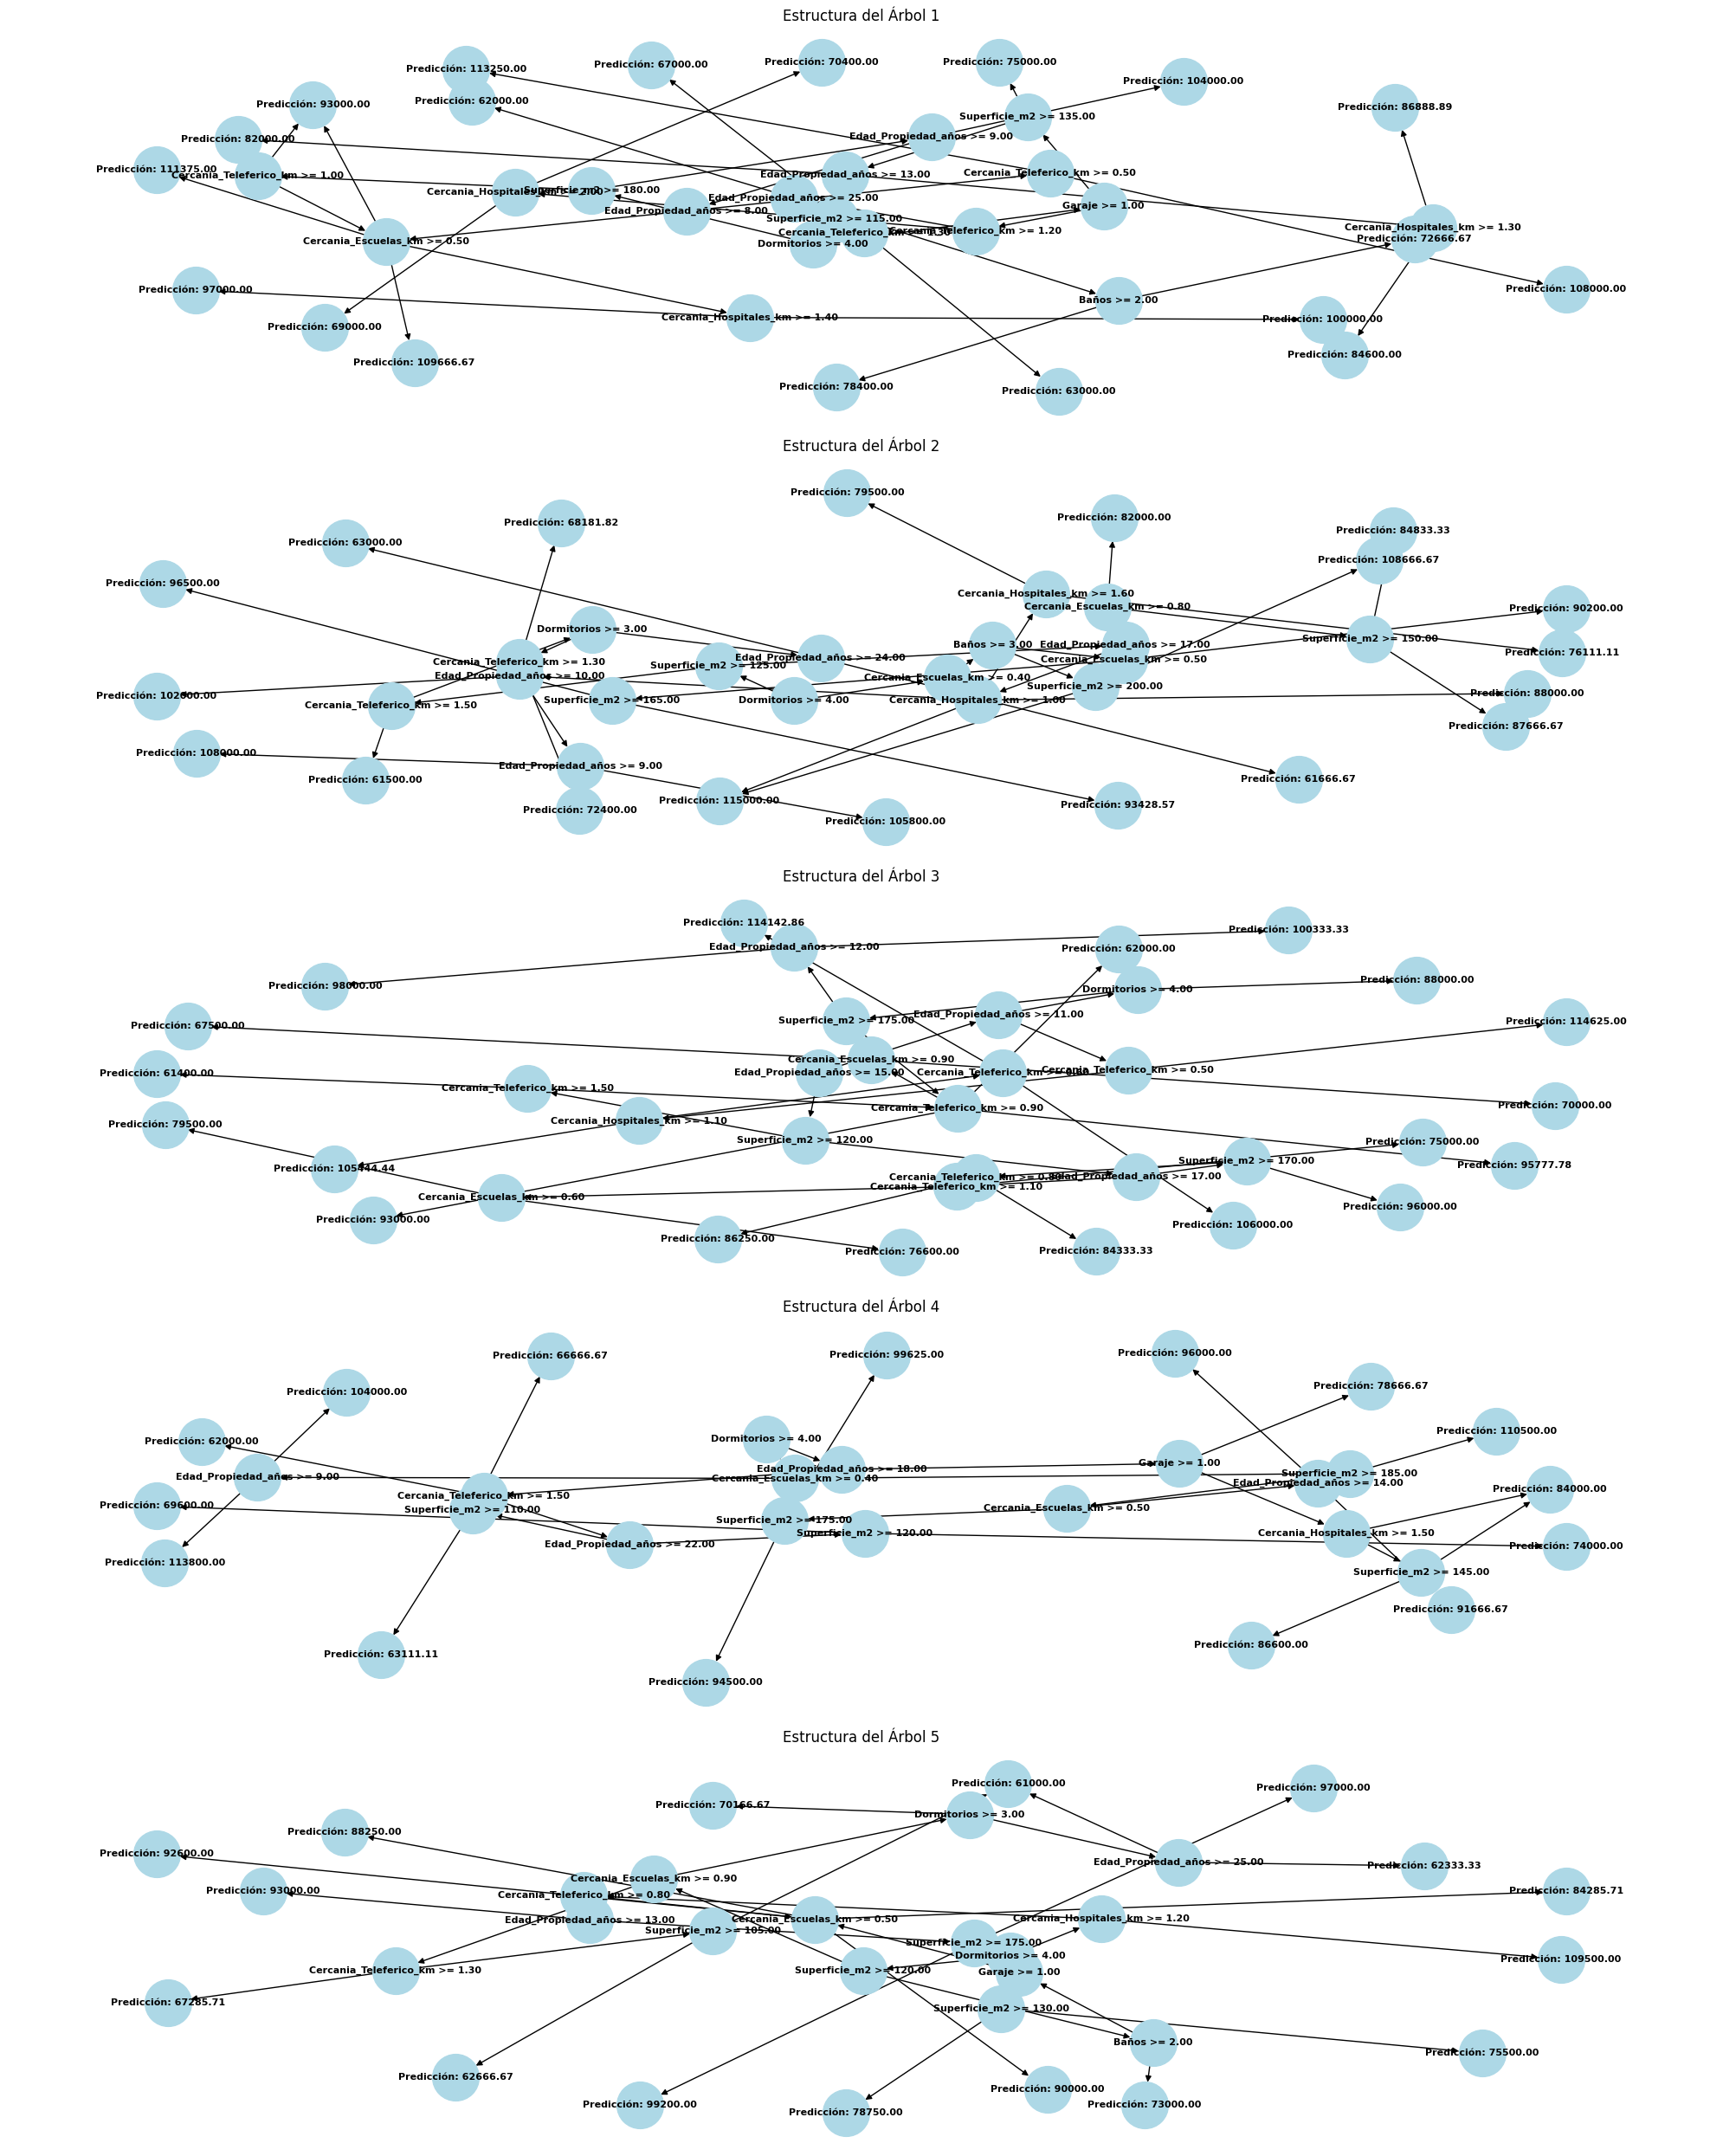

In [57]:
# Visualizar estructura de algunos árboles
analizador.visualizar_arboles(num_arboles=5)

In [ ]:
# Detalles adicionales de cada árbol
print("\nDetalles de los árboles:")
for i, arbol in enumerate(modelo_rf.arboles, 1):
    print(f"\nÁrbol {i}:")
    print(f"  Raíz: {arbol.raiz}")


Detalles de los árboles:

Árbol 1:
  Raíz: ((1, 4.0), ((3, 1.0), ((6, 1.2), ((7, 25.0), ((2, 2.0), 72666.66666666667, 78400.0), 62000.0), ((0, 115.0), ((6, 1.3), 63000.0, 67000.0), ((5, 2.0), 69000.0, 70400.0))), ((0, 135.0), 75000.0, ((7, 13.0), 82000.0, ((5, 1.3), 84600.0, 86888.88888888889)))), ((0, 180.0), ((6, 1.0), ((4, 0.5), 93000.0, ((5, 1.4), 100000.0, 97000.0)), 93000.0), ((7, 9.0), ((7, 8.0), ((6, 0.5), 113250.0, 108000.0), ((4, 0.5), 109666.66666666667, 111375.0)), 104000.0)))

Árbol 2:
  Raíz: ((1, 4.0), ((0, 125.0), ((6, 1.5), ((1, 3.0), ((7, 24.0), 63000.0, 61666.666666666664), ((6, 1.3), 72400.0, 68181.81818181818)), 61500.0), ((7, 17.0), ((4, 0.8), ((0, 150.0), 84833.33333333333, 87666.66666666667), 82000.0), ((5, 1.0), 88000.0, ((5, 1.6), 76111.11111111111, 79500.0)))), ((4, 0.4), ((5, 1.0), 115000.0, ((7, 10.0), ((7, 9.0), 108000.0, 105800.0), 102000.0)), ((2, 3.0), ((4, 0.5), 90200.0, ((0, 165.0), 93428.57142857143, 96500.0)), ((0, 200.0), 108666.66666666667, 11500